#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Regression Quality

When we build a regression model we need some way to measure the quality of the model. In this Colab we will examine a few of the ways that we can measure and graph results of a regression model in order to better understand the quality of the model.

## Overview

### Learning Objectives

* Extract quantitative measurements of a regression models predictions.
* Perform qualitative judgements of a regression models predictions.

### Prerequisites

* Intermediate Python
* Introduction to Pandas
* Visualizations

### Estimated Duration

30 minutes

### Grading Criteria

Each exercise is worth 3 points. The rubric for calculating those points is:

| Points | Description |
|--------|-------------|
| 0      | No attempt at exercise |
| 1      | Attempted exercise, but code does not run |
| 2      | Attempted exercise, code runs, but produces incorrect answer |
| 3      | Exercise completed successfully |

There are 3 exercises in this Colab so there are 9 points available. The grading scale will be 9 points.

## A Toy Dataset

We are about to talk about regression quality, but we haven't actually created a regression model yet!

Don't worry, this is actually a good thing. We will take this opportunity to reinforce our [NumPy](http://www.numpy.org/) skills by creating some artificial datasets. This will also allow us to focus on the details of grading model quality without having to also spend mental cycles on learning new regression model toolkits.

---

Start by importing [NumPy](http://numpy.org) and setting a random seed so that we get reproducible results.
 
Remember: **Do not set a random seed in non-toy code!**

In [2]:
import numpy as np

np.random.seed(0xFACADE)

Recall from our discussions about linear regressions that we are trying to fit a straight line through a set of data points. The equation for a straight line is:

> $y = m*x + b$

where `m` is the slope of the line, `b` is the intercept of the line on the y-axis, and `x` is the feature.

But at this point we don't even have `x` values!

We can use [NumPy's random.uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) function to generate x-values. In this case we'll choose 50 random numbers between 0 and 200.

In [3]:
X = np.random.uniform(low=0, high=200, size=50)

print(f'min: {np.min(X)}')
print(f'max: {np.max(X)}')
print(f'mean: {np.mean(X)}')
print(f'count: {np.size(X)}')

min: 2.1137646660836396
max: 195.5540654692904
mean: 103.84065098623267
count: 50


You should see:

  * minimum value near, but not below 0
  * max value near, but not above 200
  * mean value somewhere near 100
  * count value of exactly 50

So far, the numbers look good, but let's visualize the x-values just to get some idea of the distribution of the values in the range of 0 through 200.
 
We only have one list of values, which isn't too exciting and actually doesn't display well in two-dimensional space, which is what we need for a graph.
 
*How do we plot a one-dimensional list of values in two-dimensional space?*
 
We plot it against itself.

In [4]:
import matplotlib.pyplot as plt

plt.plot(X, X, 'g.')
plt.show()

<Figure size 640x480 with 1 Axes>

As you can see, we have a straight line of x-values that span from roughly 0 to 200. Let's now create some y-values by defining a linear function with a slope of 4 and an intercept of 10.

We'll call the new variable `Y_PRED` since it equates to what our model would predict.

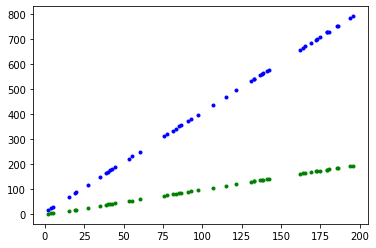

In [5]:
SLOPE = 4
INTERCEPT = 10

Y_PRED = SLOPE * X + INTERCEPT

plt.plot(X, Y_PRED, 'b.')
plt.plot(X, X, 'g.')
plt.show()

We still have a straight line of green dots for X and now we also have a line of blue dots for the y-values generated off of X. We know that there is a constant linear relationship between the lines:

> $y = 4 * x + 10$

The green dots are just our X values plotted against themselves and the blue dots are the y-values that our linear model would have predicted. At this point we can drop the X-to-X plot and just plot X-to-Y with both the Y data points and the regression line.

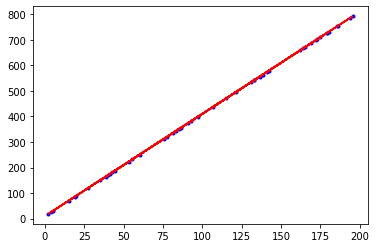

In [6]:
Y_PRED = (SLOPE * X) + INTERCEPT

plt.plot(X, Y_PRED, 'b.')
plt.plot(X, Y_PRED, 'r-')
plt.show()

What a great regression line! If only we could have this perfect of a fit in the real world. Unfortunately this is never the case. There is always some variability.
 
Let's add some variability into our y-values to get a more realistic dataset, but keep our original y-values in order to remember our base regression line.
 
To do this we'll recreate our original y-values and store them in `Y_PRED` and the calculate y-values stored in `Y` with random coefficient multipliers between -200 and 200 for variability.

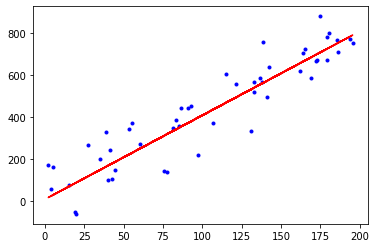

In [7]:
Y_PRED = (SLOPE * X) + INTERCEPT

Y = SLOPE * X + np.random.uniform(low=-200, high=200, size=50) + INTERCEPT

plt.plot(X, Y, 'b.')
plt.plot(X, Y_PRED, 'r-')
plt.show()

That plot looks nice. We have the line that was used to generate the data plotted in red and the randomly displaced data points in blue. The dots, though definitely not close to the line, at least follow the trend in the range of values that we have graphed. This seems like a reasonable linear regression dataset.
 
Remember that we have a few important pieces of data at the moment, some of which would be known to a model beforehand and some not:
 
* X: the x-values that we used to "train" the model
* Y: the y-values that represent the actual values that correlate to `x`
* Y_PRED: the y-values that the model would predict for each x-value

## Coefficient of Determination


The "Coefficient of Determination" is 1 minus the ratio of the residual sum of squares over the total sum of squares.
 
A **residual** is a target value minus a predicted value. The residual sum of squares is the summation of the squares of every residual in the prediction set.
 
> $$ SS_{res} = \sum_{i}(y_{i} - f_{i})^2$$

In [8]:
ss_res = ((Y - Y_PRED) ** 2).sum(axis=0,  dtype=np.float64)
print(ss_res)

479158.59399166337


The total sum of squares is the sum of the squares of the mean value of Y subtracted from each y-value.

Let's first determine the mean value of Y:

> $$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i}$$



In [9]:
y_mean = np.average(Y, axis=0)
print(y_mean)

437.15608795722386


And now we can calculate the total sum of squares:

> $$SS_{tot} = \sum_{i}(y_{i}-\bar{y})^2$$

In [10]:
ss_tot = ((Y - y_mean)**2).sum(axis=0, dtype=np.float64)
print(ss_tot)

3114537.9296444445


Given the total sum of squares and the residual sum of squares, we can calculate r-squared:

>  $$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$$

In [11]:
r2 = 1 - (ss_res/ss_tot)
print(r2)

0.8461541953202785


And now we have a quality score!
 
If you just ran the cells in this Colab from top to bottom you probably got a score of `0.8461541953202785`.
 
Is this good? Bad? Other?
 
r-squared score measures how well the actual variance from x-values to y-values is represented in the variance between the x-values and the predicted y-values.
 
Typically this score ranges from 0 to 1, where 0 is bad and 1 is a perfect mapping. However, the score can also be negative... can you guess why?
 
If you could draw a horizontal line through the data points that did a better job than your regression then the r-squared score would be negative. If you see this, try again... your model doesn't work!
 
The >0 through 1 values are more subjective though. The closer to 0 the "worse" your model is. The closer to 1 the better typically, but you also don't want to overfit. This is where testing, observation, and domain knowledge come into play.
 
---
 

To reinforce the point we will illustrate a perfectly fitting model and a horribly fitting model.
 
But first we will first learn how to calculate the coefficient of determination easier than all of the NumPy math we did above.
 
It turns out that scikit-learn can calculate r-squared for us:

In [12]:
from sklearn.metrics import r2_score

print(r2_score(Y, Y_PRED))

0.8461541953202785


Knowing that we don't have to manually do all of the math again, let's now see the perfect and a very imperfect case of a regression fitting a dataset.

To begin with we'll show a perfect fit. What happens if our predictions and our actuals are identical?

In [13]:
print(r2_score(Y, Y))
print(r2_score(Y_PRED, Y_PRED))

1.0
1.0


`1.0`... just what we thought! A perfect fit.

Now let's see if we can pull r-squared into the negative.

In this case we just need to make our predicted data look different than our actuals. To do this we'll negate our predictions and save them into a new variable called `Y_PRED_WTF`.

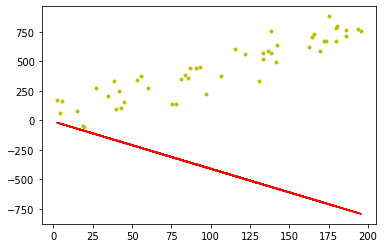

In [14]:
Y_PRED_WTF = -Y_PRED
plt.plot(X, Y, 'y.')
plt.plot(X, Y_PRED_WTF, 'r-')

That prediction line looks horrible! Indeed, a horizonal line would perform better in multiple places.

Let's check the r-squared score.

In [15]:
print(r2_score(Y, Y_PRED_WTF))

-14.624814753920019


Negative. A rare site in practice, but an easy signal to read if seen.

## Predicted vs. Actual Plots

We have now seen a quantitative way to examine our regressions, the coefficient of determination. We know that if we see negative numbers that our model is very broken and if we see numbers approaching 1, the model is probably decent.
 
But what about the in-between?
 
This is where qualitative observations based on expert opinion needs to come into play.
 
There are numerous ways to visualize regression predictions, but one of the most basic is the "predicted vs. actual" plot.
 
To create this plot you scatter-plot the actual y-values used to train your model against the predicted y-values generated off the the training features. You then draw a line on the plot from the lowest prediction to the largest.


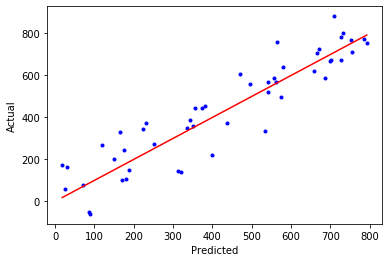

In [16]:
plt.plot(Y_PRED, Y, 'b.')
plt.plot([Y_PRED.min(), Y_PRED.max()], [Y_PRED.min(), Y_PRED.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Does this graph look okay? Actually, it does. The data points scatter pretty evenly around the prediction-to-actual line.

So what does a bad plot look like? Let's experiment with some.

Let's first negate all of our predictions, making them exactly the opposite of what they should be. This creates the exact opposite of a good actual-vs-predicted line.

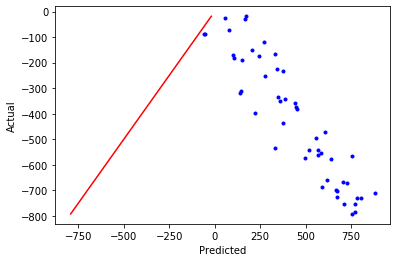

In [17]:
Y_BAD = -Y_PRED

plt.plot(Y, Y_BAD, 'b.')
plt.plot([Y_BAD.min(), Y_BAD.max()], [Y_BAD.min(), Y_BAD.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In this case we made a very contrived example where the predictions are exactly opposite of what the actual values are. When you see this case, you have a model predicting roughly opposite what it should be predicting.

Let's look at another case where we add a large positive bias to every prediction.

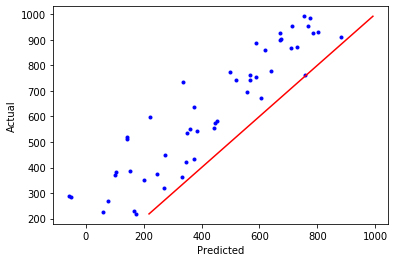

In [18]:
Y_BAD = Y_PRED + 200

plt.plot(Y, Y_BAD, 'b.')
plt.plot([Y_BAD.min(), Y_BAD.max()], [Y_BAD.min(), Y_BAD.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Now we have a situation where there is an obvious bias. All predictions are high, so the model needs to be adjusted to make smaller predictions.

There are cases that won't be quite so obvious. In the chart below you can see that the predictions are okay for low values but tend to underpredcit for larger target values.

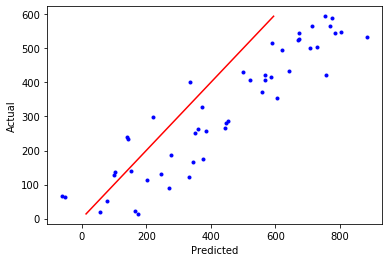

In [19]:
Y_BAD = Y_PRED - Y_PRED / 4

plt.plot(Y, Y_BAD, 'b.')
plt.plot([Y_BAD.min(), Y_BAD.max()], [Y_BAD.min(), Y_BAD.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predicted vs. Actual charts are a useful tool for giving you a visual cue as to how your model is performing across it's range of predicted values. While single measures like r-squared give you an aggregated signal, charts allow you to see if there is a trend or odd spot where your model isn't performing well.

Once you have identified problem areas, you can work on retraining your model or take different actions on different ranges of predictions based on your knowledge of how the model performs.

## Residual Plots

Another helpful visualization is a plot of residuals. As mentioned earlier, residuals are actual minus predicted values.
 
We plot residuals on the y-axis against the predicted values on the x-axis and draw a horizontal line through y=0.
 
Cases where our predictions were too low are above the line. Cases where our predictions were too high fall below the line.

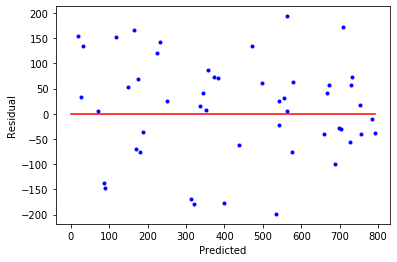

In [20]:
RESIDUALS = Y - Y_PRED
plt.plot(Y_PRED, RESIDUALS, 'b.')
plt.plot([0, Y_PRED.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In the "Predicted vs. Actual" plots above we plotted a case were there was a large positive bias in our predictions. Plotting the same data as a residual plot shows all of the residuals below the zero line.

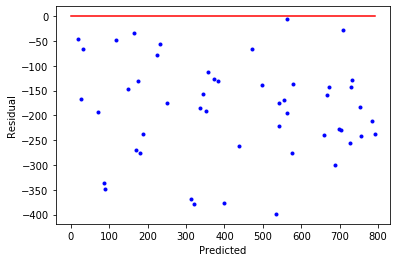

In [21]:
RESIDUALS = Y - (Y_PRED + 200)

plt.plot(Y_PRED, RESIDUALS, 'b.')
plt.plot([0, Y_PRED.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

Again taking from the "Predicted vs. Actual" examples, when we reduced our predictions by an amount proportional to the scale of the predictions, we can see the under-prediction trend in the residual chart.

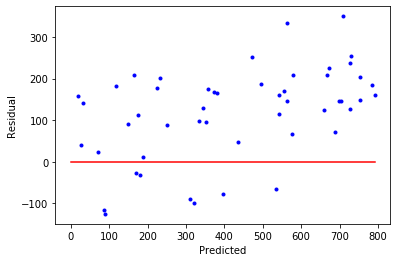

In [22]:
RESIDUALS = Y - (Y_PRED - Y_PRED / 4)

plt.plot(Y_PRED, RESIDUALS, 'b.')
plt.plot([0, Y_PRED.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

## Resources

* [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery)

# Exercises

The [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery) resource gives examples of patterns in different residual plots and what those patterns might mean about your model.
 
Each exercise below contains code that generates an image. Run the code to view then image and then find the corresponding pattern name in [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery), note the name of the pattern in the answer cell and provide a one or two sentence explanation of what this could signal about your model's predictions.

## Exercise 1

Run the code below to generate an image. Identify the corresponding residual plot pattern and write a sentence or two about what this could signal about the model.

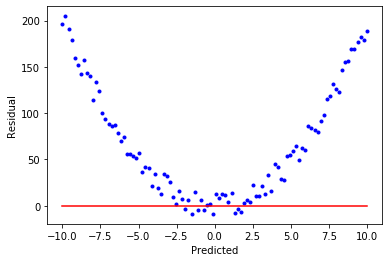

In [23]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-10.0, 10.0, 100)
f = x**2 + y**2 + np.random.uniform(low=-14, high=14, size=100)
plt.plot(x, f, 'b.')
plt.plot([x.min(), x.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

### Student Solution

*Which [plot pattern](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery)? And what might it mean about the model?*

The corresponding residual plot pattern is nonlinear.

It means the model is terrible. The predictions made by the model would be way off, meaning the model doesn’t accurately represent the relationship between x and y. Some possible fix for this is having a nonlinear model or variable transformation. 

## Exercise 2

Run the code below to generate an image. Identify the corresponding residual plot pattern and write a sentence or two about what this could signal about the model.

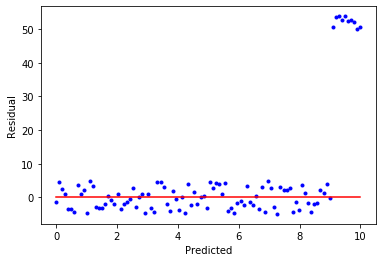

In [24]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.linspace(0.0, 10.0, 100)
y = np.concatenate([
    np.random.uniform(low=-5, high=5, size=90),
    np.random.uniform(low=50, high=55, size=10)
])
plt.plot(x, y, 'b.')
plt.plot([x.min(), x.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

### Student Solution

*Which [plot pattern](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery)? And what might it mean about the model?*

The corresponding residual plot pattern is outliers.

It means the regression model has outlying datapoints on the variables. The model seems to work well. The regression model generally isn’t affected by output outliers but is affected by input outliers. We might need to do some data preprocessiong such as delete the wrong outliers, or transform the variable with asymmetric distribution if the couple outliers is in fact a power distribution. 

## Exercise 3

Run the code below to generate an image. Identify the corresponding residual plot pattern and write a sentence or two about what this could signal about the model.

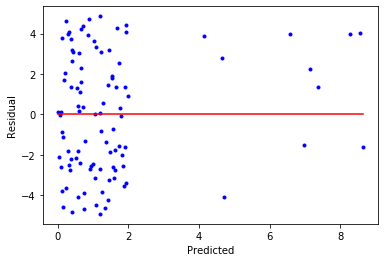

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.concatenate([
    np.random.uniform(low=0, high=2, size=90),
    np.random.uniform(low=4, high=10, size=10)
])
y = np.random.uniform(low=-5, high=5, size=100)
plt.plot(x, y, 'b.')
plt.plot([x.min(), x.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

### Student Solution

*Which [plot pattern](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery)? And what might it mean about the model?*

The corresponding residual plot pattern is X-axis Unbalanced.

It means sometimes there’s actually nothing wrong with the model. It’s more often the case that an x-axis unbalanced residual means your model can be made significantly more accurate. Most of the time you’ll find that the model was directionally correct but pretty inaccurate relative to an improved version. It can be fixed by transforming the data using an explanatory variable, or adding a variable to the model. 